# Semana 3 - Atividade 2 - Marcelo Cruz

https://www.kaggle.com/datasets/zusmani/uberdrives

### Importar bibliotecas

In [1]:
import pandas as pd # utilizado para ler e analisar os dados
import numpy as np # utilizado para manipular os dados
import matplotlib.pyplot as plt # utilizada para visualização dos dados
import seaborn as sns # utilizada para visualização dos dados
import datetime # utilizada para tratar com datas
import calendar

### Carregar os dados

Para ler um arquivo csv, utilizamos o método read_csv, da biblioteca Pandas.

In [2]:
data = pd.read_csv('/content/uberdata.csv')

### Breve olhada nos dados

Primeiro, vamos ver quantas linhas e quantas colunas nosso data set possui.

In [3]:
data.shape

(1156, 7)

Quando desejamos ver apenas uma pequena amostra dos dados, podemos utilizar o
método head(), que mostrará os primeiro 5 registros do data set.

In [4]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Verificar se há valores faltantes

O Python representa valores faltantes como **NaN**.

Vamos ver se encontramos valores assim nos dados.

Para que possamos verificar se existem valores faltantes (NaN) no data set,
utilizamos o método isnull(), que retorna True ou False para cada célula.
Porém, seria inviável vermos se todos os valores correspondem a True ou False.
Para facilitar nosso trabalho, podemos somar estes resultados utilizando 
o método sum().

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Podemos ver que o atributo PURPOSE é o pior de todos, pois contém 503 valores
faltantes.

O que podemos fazer para tratar isso?

Poderíamos simplesmente deletar os registros que possuem valores faltantes, mas isso causaria a perda de muitos dados. Outra alternativa é substituirmos estes valores por outros já existentes.

No caso do atributo PURPOSE, estamos lidando com uma variável categórica, ou seja, que podem assumir apenas alguns valores específicos. Para tratar este tipo de variável faltante, nós os substituimos pela moda, que seria o valor que mais aparece.

Então, vamos descobrir qual é o valor que mais aparece no atributo PURPOSE.

Podemos fazer isso olhando todos os valores que o atributo possui, utilizando o método value_counts().

In [6]:
data['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

Ou podemos ir direto ao ponto, utilizando o método mode() que, como você deve estar pensando, retorna a moda.

In [7]:
data['PURPOSE*'].mode()

0    Meeting
dtype: object

Agora, chegou a hora de substituir os valores faltantes por Meeting.

In [8]:
#data['PURPOSE*'] = data['PURPOSE*'].fillna(data['PURPOSE*'].mode)
# por algum motivo, esta mudança está causando o seguinte erro:
# RecursionError: maximum recursion depth exceeded in comparison
# por isso, ele foi comentado


Vamos verificar a contagem dos valores faltantes novamente.

In [9]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Voilà! Não temos mais nenhum valor faltante no atributo PURPOSE.

Para o restante dos valores, podemos dropar, pois não são significantes.

In [10]:
data = data.dropna()
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

## Atributos com tipo de dado correto



Vamos verificar se os atributos do nosso data set estão no formato correto.

In [11]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

Logo podemos ver que os atributos START_DATE e END_DATE não estão no formato correto, pois deveriam estar no formato date.

Vamos convertê-los para o tipo correto.

In [12]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')

Vamos ver os tipos novamente.

In [13]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

## Dividir os valores das datas

Para que possamos manusear as datas com mais facilidade, vamos separar a hora, o dia, o dia da semana, o mês e o nome dos dias das semana.

Primeiro, vamos criar as variáveis onde iremos armazenar estes valores.

In [14]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

Agora, vamos pegar todos estes valores do atributo START_DATE.

In [15]:
for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

O próximo passo é criar os atributos correspondentes.

In [25]:
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

Vamos ver como ficou.

In [29]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## Categorias de viagem

In [30]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

Podemos ver que a categoria Business, em que a conta está relacionada ao seu trabalho, é a mais utilizada, de longe. Mais adiante veremos o porquê.

Vamos ver isso de forma gráfica.

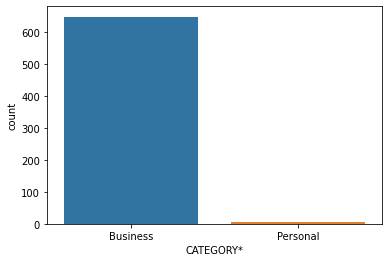

In [31]:
sns.countplot(x='CATEGORY*', data=data)

## Qual a distância que as pessoas viagem de Uber?

Vamos ver isso utilizando um gráfico de histograma.

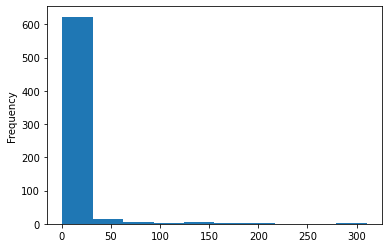

In [32]:
data['MILES*'].plot.hist()

Podemos ver que a grande maioria dos usuários fazem viagens de curta distância.

## Qual o horário que as pessoas mais costumam utilizar o Uber?

Esta é uma boa pergunta, pois podemos saber qual horário é melhor para notificar algo aos usuários, como uma propaganda, por exemplo.

Text(0.5, 1.0, 'Number of trips vs hours')

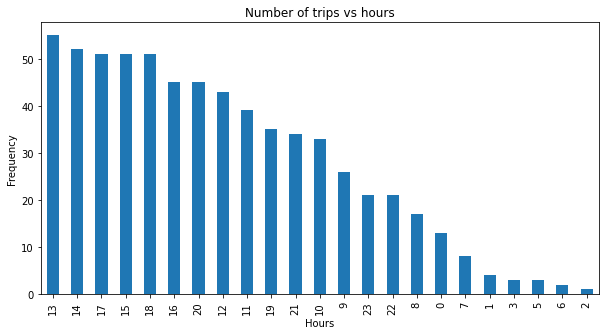

In [43]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot.bar(figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs hours')

Podemos ver que o horário que as pessoas mais utilizam Uber é às 13h, seguido pelos horários de 14h, 17h, 15h e 18h.

## Qual o próposito da viagem?

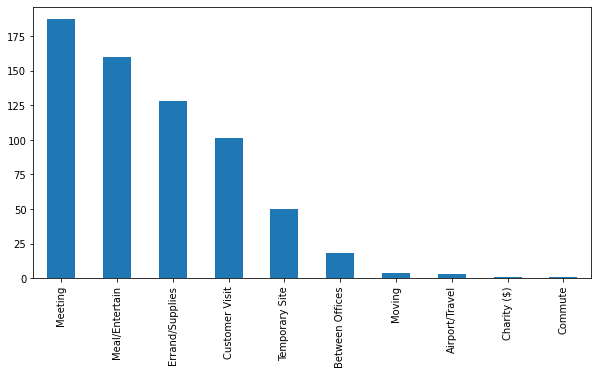

In [34]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5))

Podemos ver que as pessoas utilizaram mais o serviço para ir a Meeting.

Isto é interessante, pois a Uber pode focar pessoas que vão a reuniões com mais frequência. Por exemplo, oferecer um desconto para quem usa o serviço para ir a reuniões ou para jantar/entretenimento.

## Qual dia tem o maior número de viagens?

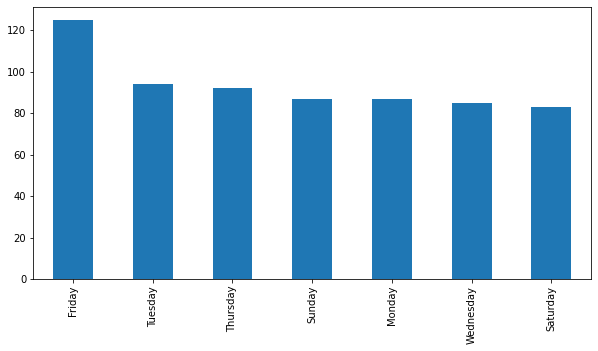

In [35]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5))

Podemos ver que o dia que as pessoas mais viajam é Sexta-feira

## Qual o número de viagens por dia?

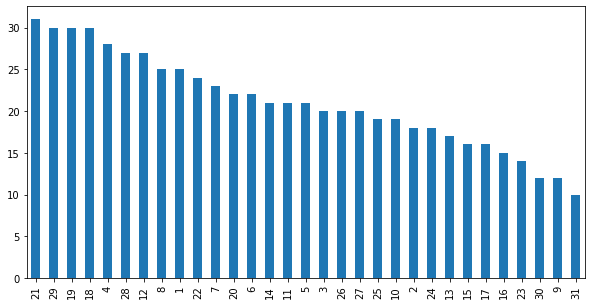

In [36]:
data['DAY'].value_counts().plot(kind='bar', figsize=(10,5))

Podemos ver que o dia 21 é o dia em que as pessoas mais viajam. Elas viajam bastante no dia 29, mas pouco nos dias 30 e 31, o que é interessante.

## Qual o número de viagens por mês?

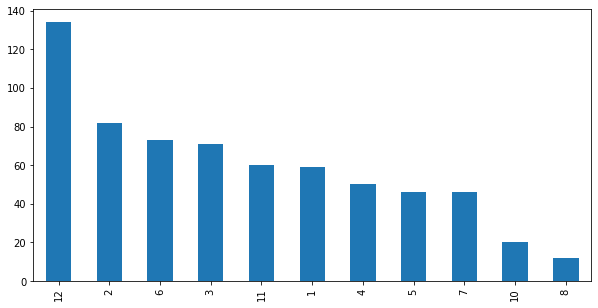

In [37]:
data['MONTH'].value_counts().plot(kind='bar', figsize=(10,5))

Podemos ver que as pessoas viajam bastante em dezembro, e muito pouco em agosto.

## A partir de onde as pessoas mais saem e vão?

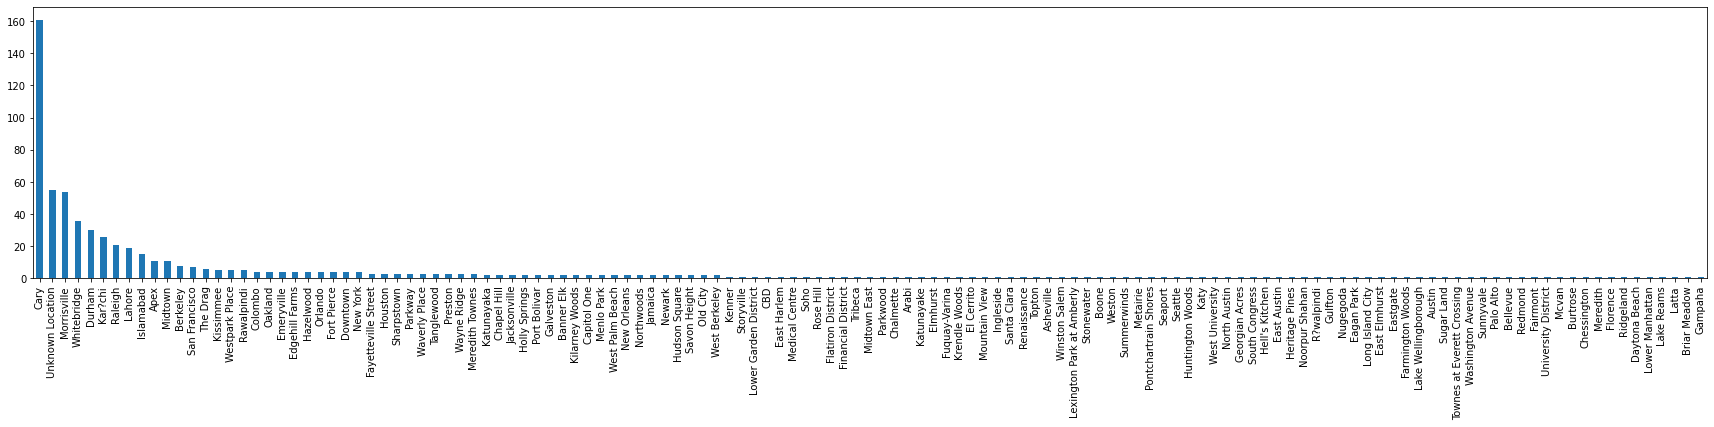

In [40]:
data['START*'].value_counts().plot(kind='bar', figsize=(30,5))

As pessoas saem mais de Cary, mas também costumam não dizer de onde saem exatamente, como podemos ver ali em segundo lugar. O motivo pode ser porque elas utilizam a localização atual e não digitam nada.

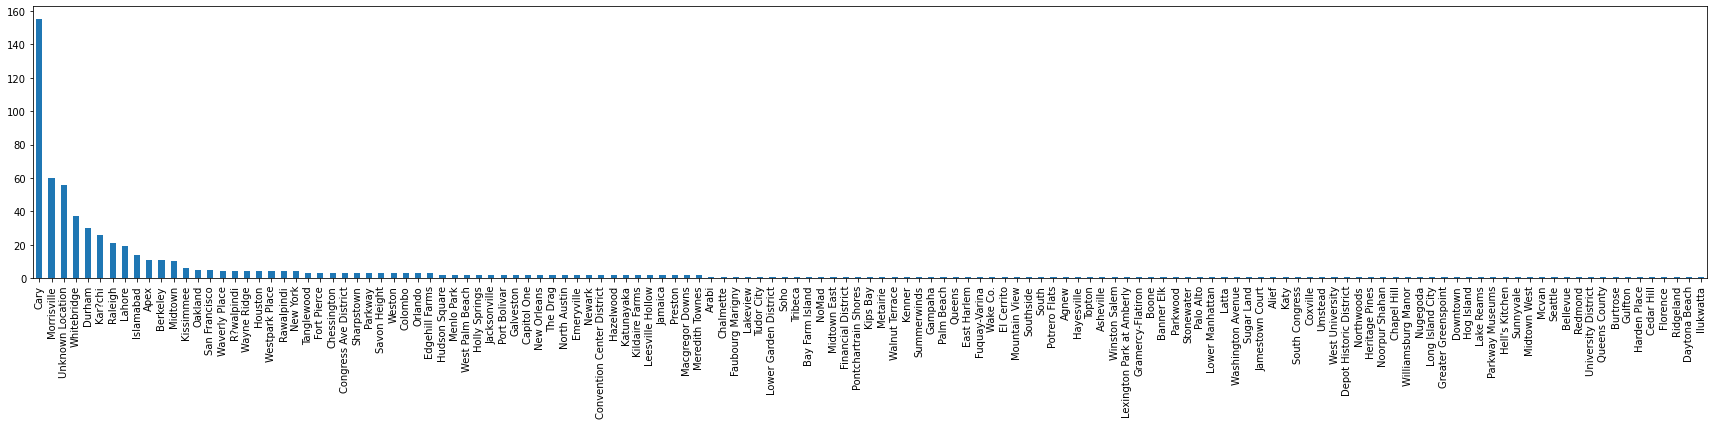

In [42]:
data['STOP*'].value_counts().plot(kind='bar', figsize=(30,5))

As pessoas também vão muito para o mesmo endereço de que mais saem, Cary. O mesmo ocorre com os endereços desconhecidos, que está em terceiro.